# Simulator Response Comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numba import jit

%matplotlib inline

In [91]:
# Assumes times are ordered
@jit(nopython=True)
def get_ISIs(ids, times, num_neurons=3200):
    ISIs = np.empty((np.sum(ids < num_neurons)))
    currentloc = 0
    num_responsive_neurons = 0
    for n in range(num_neurons):
        indv_neuronspikes = np.sort(times[ids == n])
        numiterate = len(indv_neuronspikes) - 1
        if (numiterate > 0):
            num_responsive_neurons += 1
            difference = indv_neuronspikes[1:] - indv_neuronspikes[0:-1]
            ISIs[currentloc:(currentloc + numiterate)] = difference
            currentloc += numiterate
    return (ISIs[:-num_responsive_neurons])

def get_rates(ids, times, num_neurons=3200, starttime=0.0, endtime=100.0):
    neuronrates = np.empty(num_neurons)
    mask = times > starttime
    for n in range(num_neurons):
        num_spikes = np.sum(ids[mask] == (n))
        neuronrates[n] = num_spikes / (endtime - starttime)
    return (neuronrates)

### Loading Auryn firing times

In [92]:
ls ../auryn/

Build/        coba.0.i.ras       Makefile                timefile.dat
coba.0.e.ras  coba_e_merged.ras  sim_coba_benchmark.cpp


In [93]:
auryn_df = pd.read_csv("../auryn/coba.0.e.ras", delim_whitespace=True, header=None, names=["times", "ids"])

In [94]:
# Calculate ISIs
auryn_ISIs = get_ISIs(auryn_df["ids"].values, auryn_df["times"].values)
# Calculating firing rates for the last 50s
auryn_neuronrates = get_rates(auryn_df["ids"].values, auryn_df["times"].values)

KeyboardInterrupt: 

In [95]:
auryn_data = {
    "name": "Auryn",
    "spikes": auryn_df,
    "ISIs": auryn_ISIs,
    "rates": auryn_neuronrates
}

NameError: name 'auryn_ISIs' is not defined

In [ ]:
np.mean(auryn_neuronrates)

### Loading Nest firing times

In [ ]:
ls ../pyNest/

In [ ]:
nest_df = pd.read_csv("../pyNest/va-py-ex-4001-0.gdf", delim_whitespace=True, header=None, names=["ids", "times"])

In [ ]:
# Bring nest timing into seconds
nest_df["times"] /= 1000.0

In [ ]:
# Calculate ISIs
nest_ISIs = get_ISIs(nest_df["ids"].values - 1, nest_df["times"].values)
# Calculating firing rates for the last 50s
nest_neuronrates = get_rates(nest_df["ids"].values - 1, nest_df["times"].values)

In [ ]:
nest_data = {
    "name": "Nest",
    "spikes": nest_df,
    "ISIs": nest_ISIs,
    "rates": nest_neuronrates
}

In [ ]:
np.mean(nest_neuronrates)

### Loading Spike firing times

In [183]:
ls ../Spike/Build/

CMakeCache.txt       Makefile      VASpikeIDs.bin
CMakeFiles/          milliVA*      VASpikeTimes.bin
cmake_install.cmake  timefile.dat  VogelsAbbottNet*


In [192]:
idsfile = "../Spike/Build/VASpikeIDs.bin"
timesfile = "../Spike/Build/VASpikeTimes.bin"
spike_df_second = pd.DataFrame(data = {"ids": np.fromfile(idsfile, dtype=np.int32), "times": np.fromfile(timesfile, dtype=np.float32)})


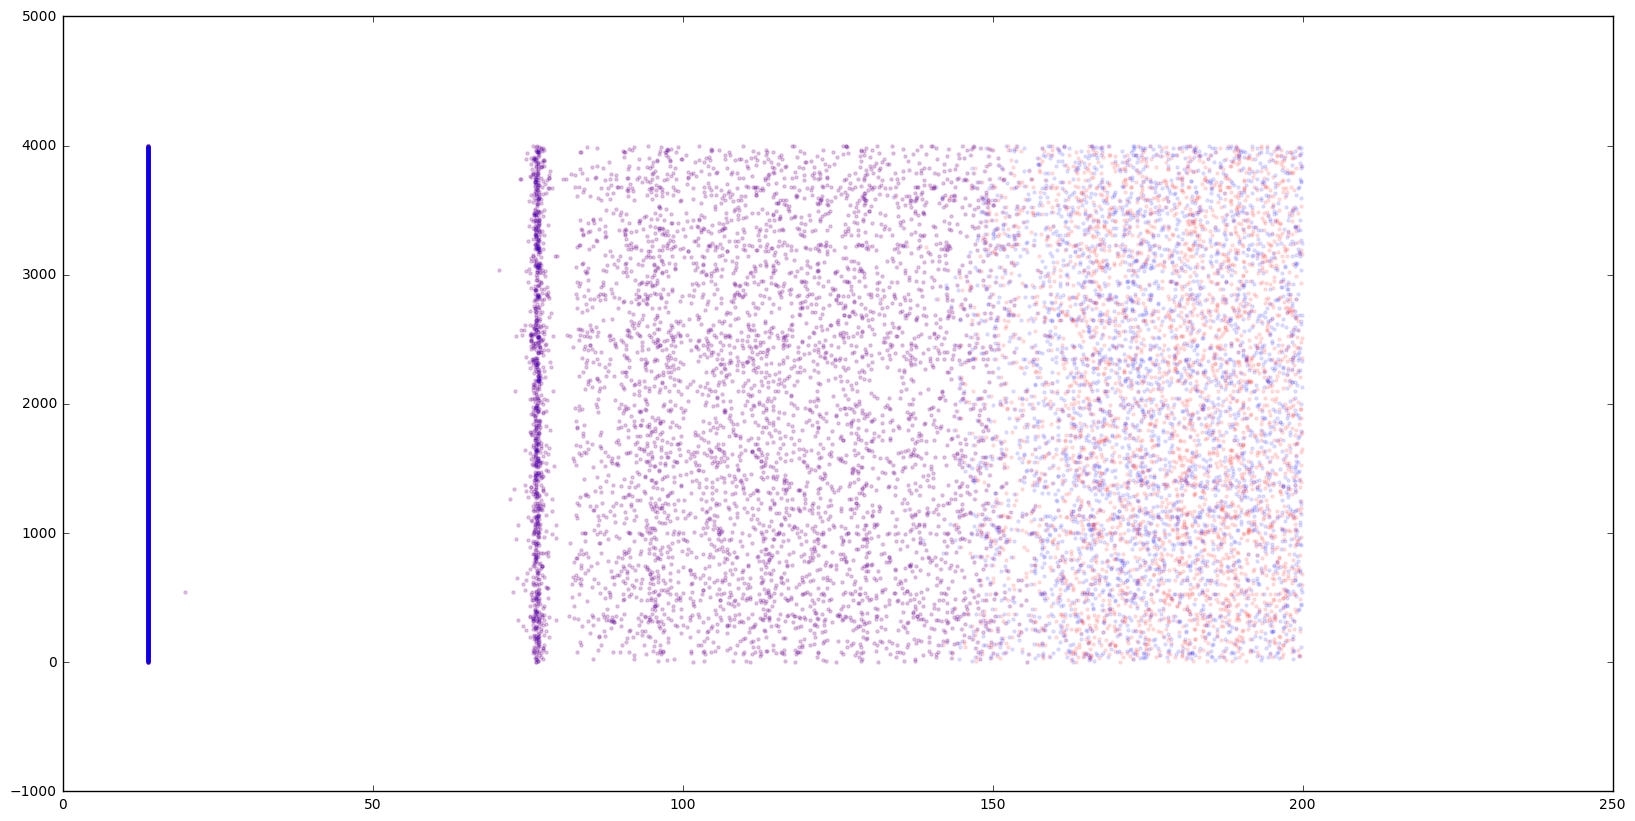

In [193]:
plt.figure(figsize=(20,10))
mask = spike_df["times"] < 200.0
mask_second = spike_df_second["times"] < 200.0
plt.scatter(spike_df["times"][mask], spike_df["ids"][mask], s=5, color='r', alpha=0.1)
plt.scatter(spike_df_second["times"][mask_second], spike_df_second["ids"][mask_second], s=5, color='b', alpha=0.1)

(-0.1, 1.1)

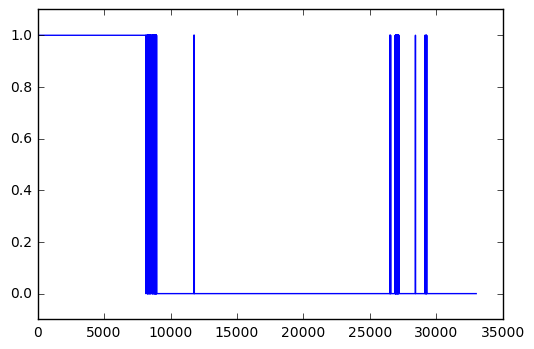

In [194]:
plt.plot(np.abs(spike_df["times"] - spike_df_second["times"][:len(spike_df["times"])]) < 0.1)
plt.ylim([-0.1, 1.1])

In [199]:
np.argmin((np.abs(spike_df["times"] - spike_df_second["times"][:len(spike_df["times"])]) < 0.1))

8140

In [205]:
spike_df["ids"][8140], spike_df_second["ids"][8140]

(2647, 847)

In [204]:
spike_df["times"][8140], spike_df_second["times"][8140]

(129.8, 129.8)

In [149]:
spike_df["ids"][8140], spike_df["times"][8140], spike_df_second["ids"][8140], spike_df_second["times"][8140]

(507, 129.8, 2647, 129.90001)

In [146]:
(np.abs(spike_df["times"] - spike_df_second["times"][:len(spike_df["times"])]) < 0.1)[8100:8150]

8100     True
8101     True
8102     True
8103     True
8104     True
8105     True
8106     True
8107     True
8108     True
8109     True
8110     True
8111     True
8112     True
8113     True
8114     True
8115     True
8116     True
8117     True
8118     True
8119     True
8120     True
8121     True
8122     True
8123     True
8124     True
8125     True
8126     True
8127     True
8128     True
8129     True
8130     True
8131     True
8132     True
8133     True
8134     True
8135     True
8136     True
8137     True
8138     True
8139     True
8140    False
8141     True
8142     True
8143     True
8144     True
8145     True
8146     True
8147     True
8148     True
8149     True
Name: times, dtype: bool

In [137]:
spike_df_second["times"][8000:8050]

8000    128.300003
8001    128.300003
8002    128.300003
8003    128.300003
8004    128.300003
8005    128.300003
8006    128.400009
8007    128.400009
8008    128.400009
8009    128.400009
8010    128.400009
8011    128.400009
8012    128.400009
8013    128.500000
8014    128.500000
8015    128.500000
8016    128.500000
8017    128.500000
8018    128.600006
8019    128.600006
8020    128.600006
8021    128.600006
8022    128.600006
8023    128.600006
8024    128.600006
8025    128.600006
8026    128.699997
8027    128.699997
8028    128.699997
8029    128.699997
8030    128.699997
8031    128.699997
8032    128.699997
8033    128.699997
8034    128.800003
8035    128.800003
8036    128.800003
8037    128.800003
8038    128.800003
8039    128.800003
8040    128.800003
8041    128.900009
8042    128.900009
8043    128.900009
8044    128.900009
8045    128.900009
8046    128.900009
8047    128.900009
8048    128.900009
8049    128.900009
Name: times, dtype: float32

In [138]:
spike_df["times"][8000:8050]

8000    128.300003
8001    128.300003
8002    128.300003
8003    128.300003
8004    128.300003
8005    128.300003
8006    128.400009
8007    128.400009
8008    128.400009
8009    128.400009
8010    128.400009
8011    128.400009
8012    128.400009
8013    128.500015
8014    128.500015
8015    128.500015
8016    128.500015
8017    128.500015
8018    128.600006
8019    128.600006
8020    128.600006
8021    128.600006
8022    128.600006
8023    128.600006
8024    128.600006
8025    128.600006
8026    128.700012
8027    128.700012
8028    128.700012
8029    128.700012
8030    128.700012
8031    128.700012
8032    128.700012
8033    128.700012
8034    128.800003
8035    128.800003
8036    128.800003
8037    128.800003
8038    128.800003
8039    128.800003
8040    128.800003
8041    128.900009
8042    128.900009
8043    128.900009
8044    128.900009
8045    128.900009
8046    128.900009
8047    128.900009
8048    128.900009
8049    128.900009
Name: times, dtype: float32

In [59]:
index = 4011
print(spike_df["times"][index], spike_df_second["times"][index])
print(spike_df["ids"][index], spike_df_second["ids"][index])

(0.073700003, 0.073699996)
(3744, 3744)


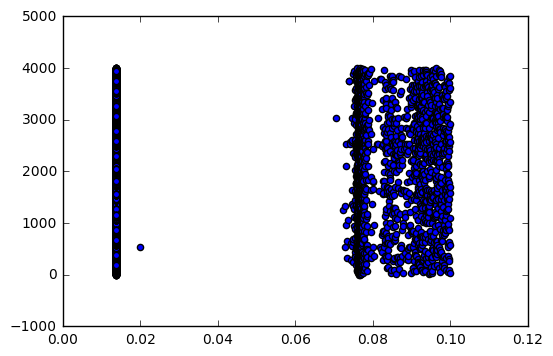

In [21]:
mask = spike_df["times"] < 0.1
plt.scatter(spike_df["times"][mask], spike_df["ids"][mask])

In [18]:
# Calculate ISIs
spike_ISIs = get_ISIs(spike_df["ids"].values, spike_df["times"].values)
# Calculating firing rates for the last 50s
spike_neuronrates = get_rates(spike_df["ids"].values, spike_df["times"].values)

In [4]:
spike_data = {
    "name": "Spike",
    "spikes": spike_df,
    "ISIs": spike_ISIs,
    "rates": spike_neuronrates
}

NameError: name 'spike_ISIs' is not defined

In [20]:
np.mean(spike_neuronrates)

17.518084374999997

### Loading ANNarchy firing times

In [21]:
ls ../ANNarchy/

annarchy/  COBA.py  spikes.out  timefile.dat


In [22]:
spikesfile = "../ANNarchy/spikes.out"
annarchy_df = pd.read_csv(spikesfile, delim_whitespace=True, header=None, names=["ids", "times"])

In [23]:
# Bring ANNarchy timing into seconds
annarchy_df["times"] /= 10000.0

In [24]:
# Calculate ISIs
annarchy_ISIs = get_ISIs(annarchy_df["ids"].values, annarchy_df["times"].values)
# Calculating firing rates for the last 50s
annarchy_neuronrates = get_rates(annarchy_df["ids"].values, annarchy_df["times"].values)

In [25]:
annarchy_data = {
    "name": "ANNarchy",
    "spikes": annarchy_df,
    "ISIs": annarchy_ISIs,
    "rates": annarchy_neuronrates
}

In [26]:
np.mean(annarchy_neuronrates)

17.194906249999999

### Loading Brian2 firing times

In [27]:
ls ../brian2/

COBA.py  spikes.out  timefile.dat


In [28]:
spikesfile = "../brian2/spikes.out"
brian2_df = pd.read_csv(spikesfile, delim_whitespace=True, header=None, names=["ids", "times"])

In [29]:
# Calculate ISIs
brian2_ISIs = get_ISIs(brian2_df["ids"].values, brian2_df["times"].values)
# Calculating firing rates for the last 50s
brian2_neuronrates = get_rates(brian2_df["ids"].values, brian2_df["times"].values)

In [30]:
brian2_data = {
    "name": "Brian2",
    "spikes": brian2_df,
    "ISIs": brian2_ISIs,
    "rates": brian2_neuronrates
}

In [31]:
np.mean(brian2_neuronrates)

17.394843750000003

### Loading GeNN firing times

In [36]:
ls ../genn/

generateALL*  parameters.h  simulator_wrapper*    timer.h
lif.h         simulator*    sm_version.mk         va_benchmark_CODE/
Makefile      simulator.cc  spike_csv_recorder.h
matLoader.h   simulator.d   spikes.csv
model.cc      simulator.o   timefile.dat


In [37]:
spikesfile = "../genn/spikes.csv"
genn_df = pd.read_csv(spikesfile)
genn_df = genn_df.rename(index=str, columns={" Neuron ID": "ids", "Time [ms]": "times"})

In [38]:
# Bring timing into seconds
genn_df["times"] /= 10000.0

In [39]:
# Calculate ISIs
genn_ISIs = get_ISIs(genn_df["ids"].values, genn_df["times"].values)
# Calculating firing rates for the last 50s
genn_neuronrates = get_rates(genn_df["ids"].values, genn_df["times"].values)

In [40]:
genn_data = {
    "name": "GeNN",
    "spikes": genn_df,
    "ISIs": genn_ISIs,
    "rates": genn_neuronrates
}

In [41]:
np.mean(genn_neuronrates)

17.052209375

## Comparing Simulators

In [42]:
simulator_data = [
    nest_data,
    spike_data,
    auryn_data,
    annarchy_data,
    brian2_data,
    genn_data
]

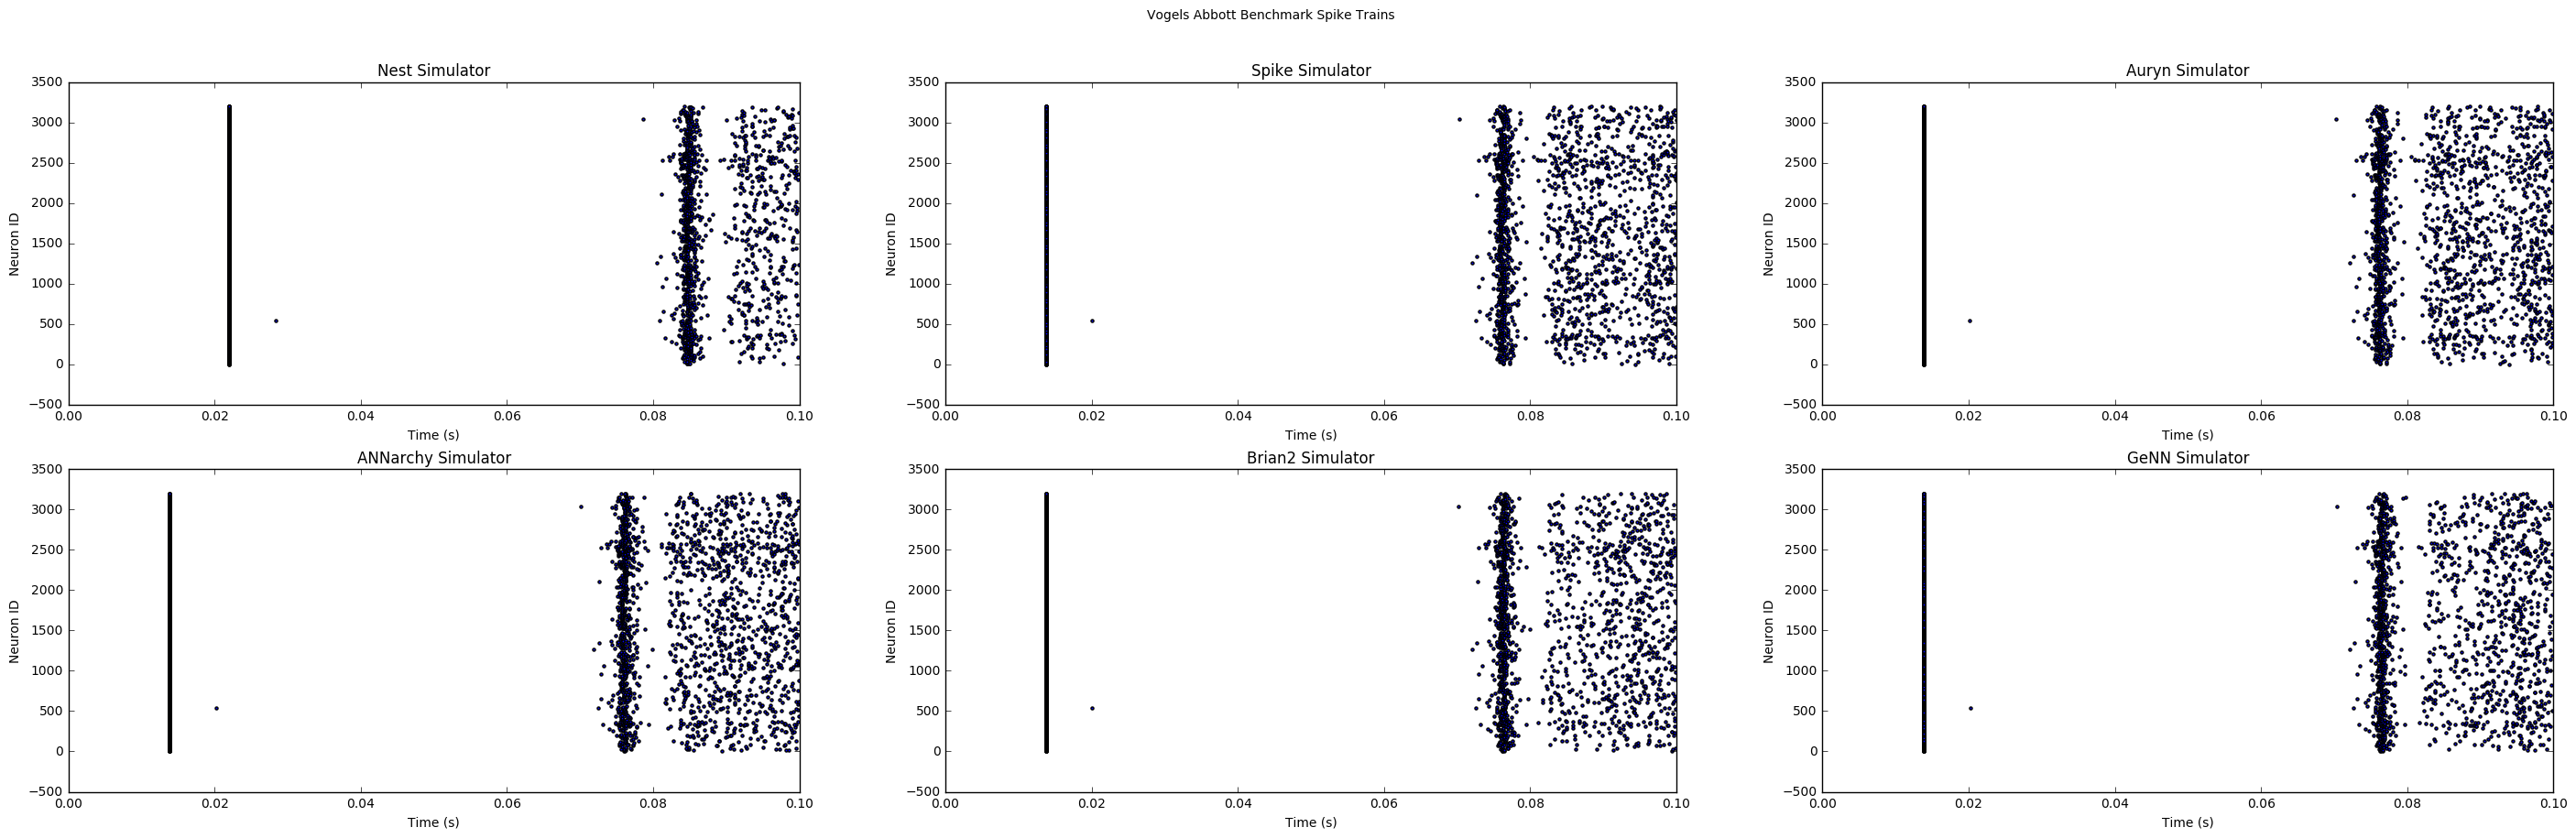

In [43]:
fig = plt.figure(figsize=(35, 10))
starttime = 0.0
endtime = 0.1

for index, data in enumerate(simulator_data):
    ax = plt.subplot(2, len(simulator_data) / 2, index + 1)
    mask = (data["spikes"]["times"] > starttime) & (data["spikes"]["times"] < endtime) & (data["spikes"]["ids"] < 3200)
    ax.scatter(data["spikes"]["times"][mask], data["spikes"]["ids"][mask], marker='.')
    ax.set_title(data["name"] + " Simulator")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Neuron ID")
    ax.set_xlim([starttime, endtime])

fig.suptitle('Vogels Abbott Benchmark Spike Trains')

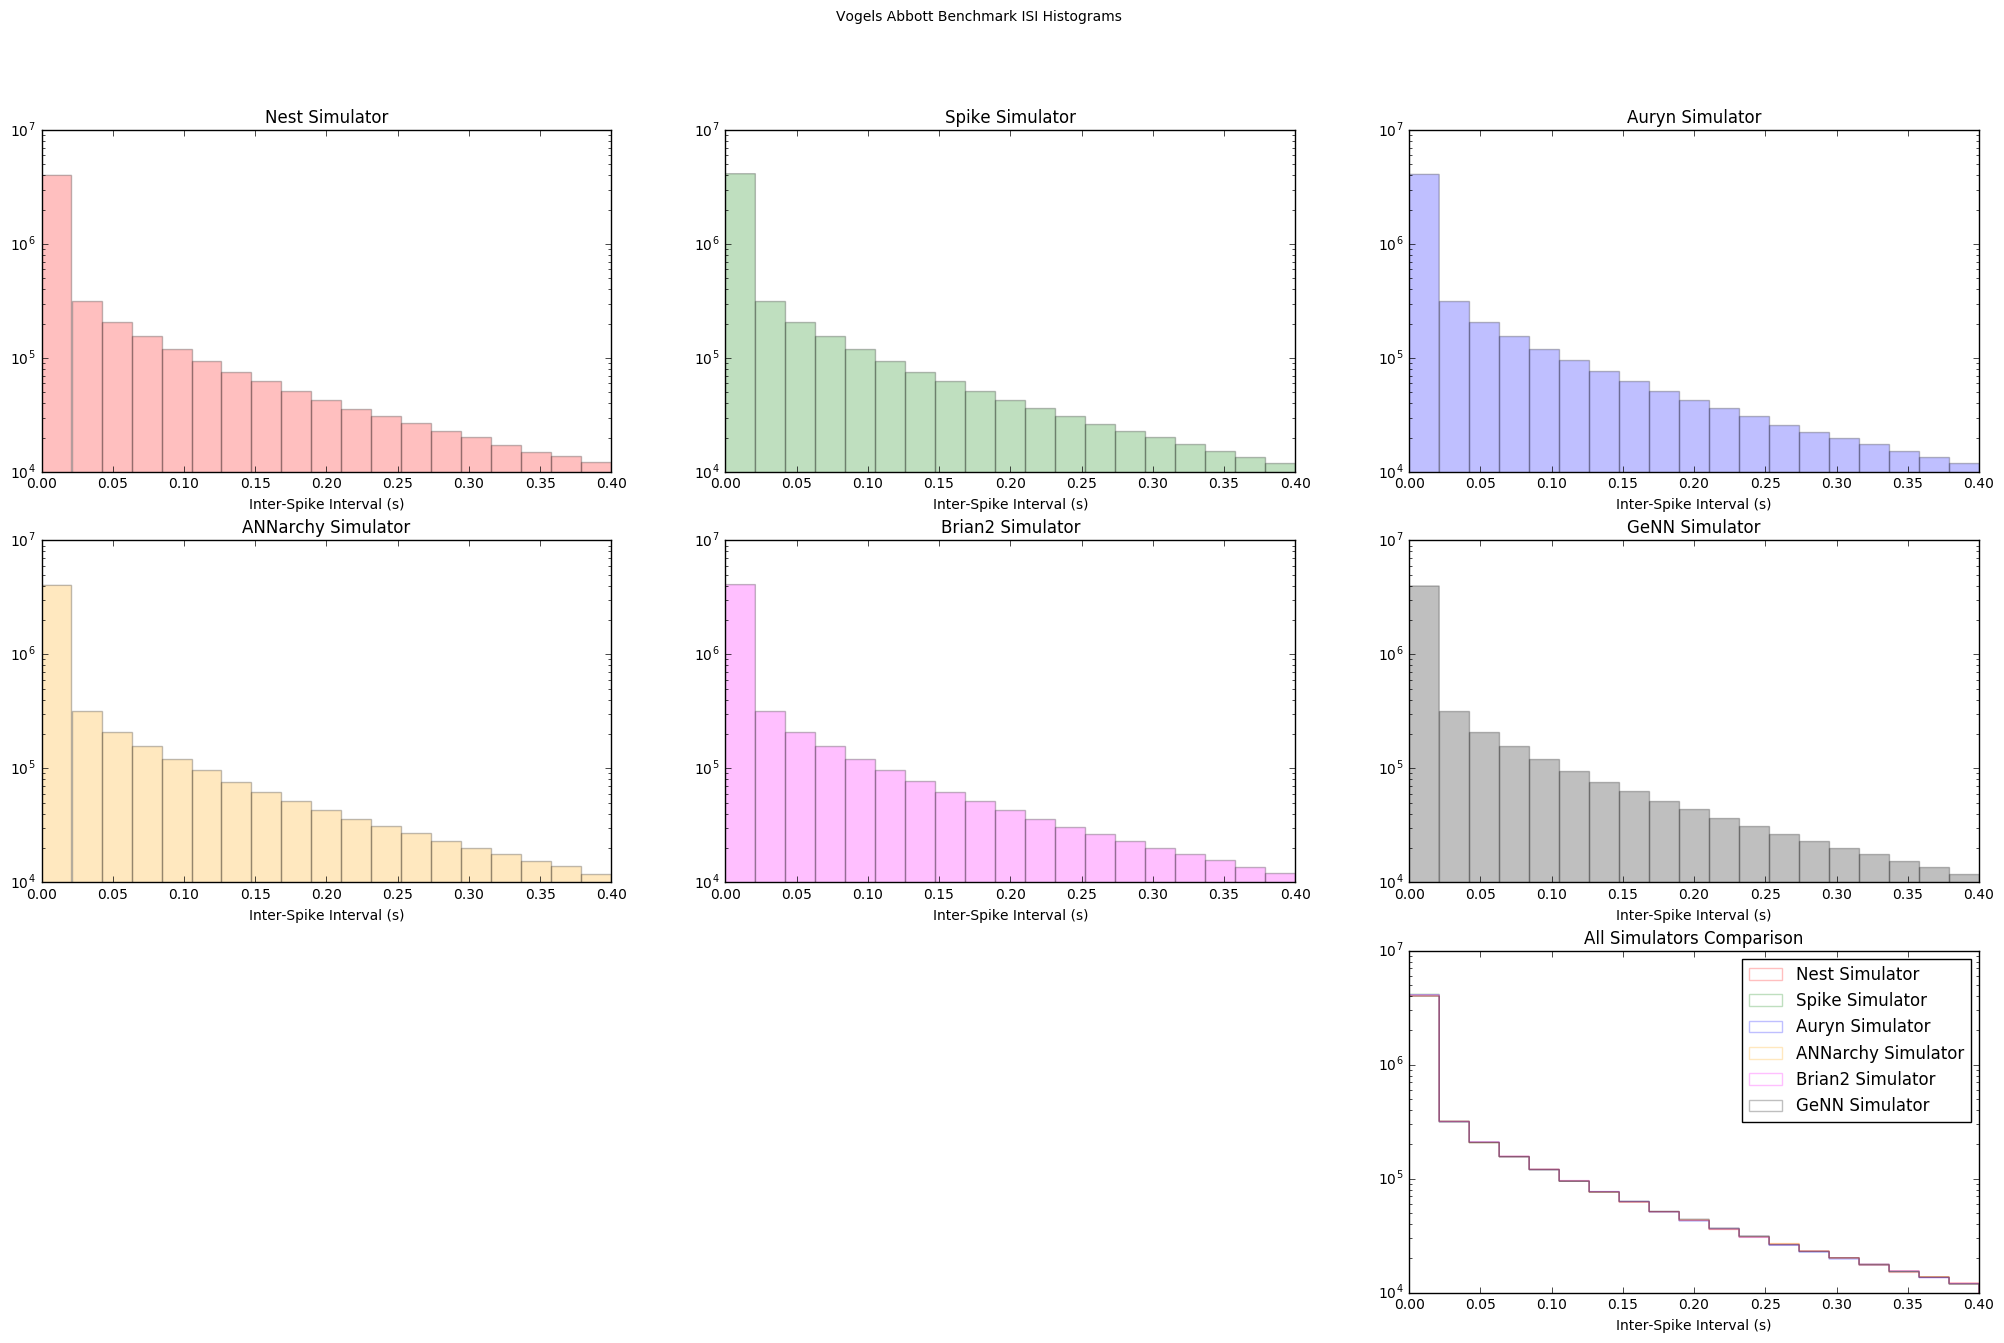

In [44]:
binvals = np.linspace(0.0, 0.4, 20)
colours = ['red', 'green', 'blue', 'orange', 'magenta', 'black']
fig = plt.figure(figsize=(25, 15))
num_rows = 3

#Individual ISI plots
for index, data in enumerate(simulator_data):
    ax = plt.subplot(num_rows, int(np.ceil(float(len(simulator_data) + 1) / num_rows)), index + 1)
    ax.set_yscale('log')
    ax.hist(np.asarray(data["ISIs"]), bins=binvals, label=(data["name"] + " Simulator"), alpha=0.25, color=colours[index])
    ax.set_title(data["name"] + " Simulator")
    ax.set_xlabel("Inter-Spike Interval (s)")
    ax.set_xlim([0.00, 0.40])
    ax.set_ylim([10**4, 10**7])


# Combined ISI plot
all_ax = plt.subplot(num_rows, int(np.ceil(float(len(simulator_data) + 1) / num_rows)), (num_rows * int(np.ceil(float(len(simulator_data) + 1) / num_rows))))
for index, data in enumerate(simulator_data):
    all_ax.hist(np.asarray(data["ISIs"]), bins=binvals, label=(data["name"] + " Simulator"), alpha=0.25, color=colours[index], histtype=u'step')
all_ax.set_title("All Simulators Comparison")
all_ax.set_xlabel("Inter-Spike Interval (s)")
all_ax.set_yscale('log')
all_ax.set_ylim([10**4, 10**7])
all_ax.set_xlim([0.00, 0.40])
all_ax.legend()

fig.suptitle('Vogels Abbott Benchmark ISI Histograms')

In the plots above, note that the simulators have close to identical ISI distributions except for Brian2

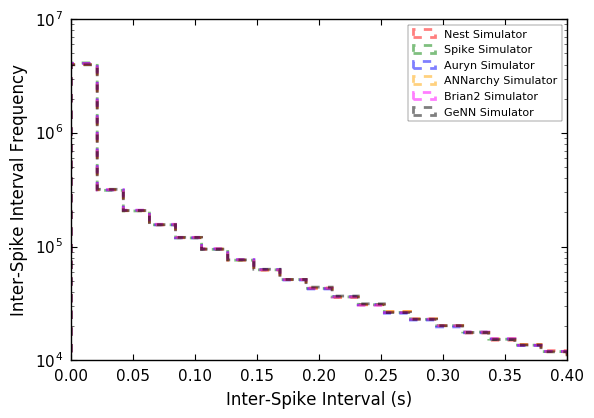

In [59]:
plt.style.use('seaborn-paper')
# Combined ISI plot
fig = plt.figure()
all_ax = plt.subplot(1, 1, 1)
for index, data in enumerate(simulator_data):
    all_ax.hist(np.asarray(data["ISIs"]), bins=binvals, label=(data["name"] + " Simulator"), alpha=0.5,ls="--", lw=2, color=colours[index], histtype=u'step')
# all_ax.set_title("All Simulators Comparison")
all_ax.set_ylabel("Inter-Spike Interval Frequency", size=12)
all_ax.set_xlabel("Inter-Spike Interval (s)", size=12)
all_ax.set_yscale('log')
all_ax.xaxis.set_tick_params(labelsize=11)
all_ax.yaxis.set_tick_params(labelsize=11)
all_ax.set_ylim([10**4, 10**7])
all_ax.set_xlim([0.00, 0.40])
all_ax.legend()

fig.savefig('ISI_comparison.png', dpi=300)


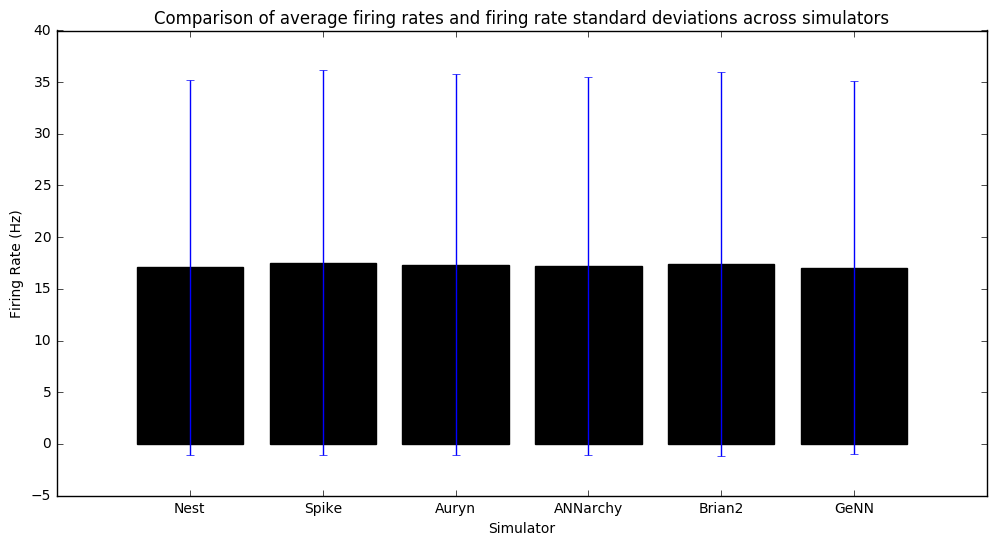

In [45]:
fig = plt.figure(figsize=(12, 6))

meanrates = []
ratestd = []
labelstrings = []

for index, data in enumerate(simulator_data):
    meanrates.append(np.mean(data["rates"]))
    ratestd.append(np.std(data["rates"]))
    labelstrings.append(data["name"])

plt.bar(range(len(simulator_data)), meanrates, yerr=ratestd, color="k", align='center')
plt.xticks(range(len(simulator_data)), labelstrings)
plt.ylabel("Firing Rate (Hz)")
plt.xlabel("Simulator")
plt.title("Comparison of average firing rates and firing rate standard deviations across simulators")

In [117]:
myarray = np.random.rand(100)

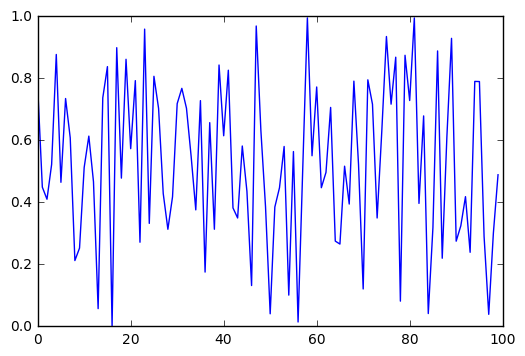

In [118]:
plt.plot(myarray)